### Time walk correction

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
template = np.fromfile('pulse_template.data')

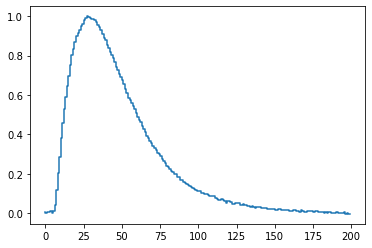

In [47]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [71]:
time = np.arange(0,290,1)
print(len(time),len(template))
template_smooth = lowess(template, time, is_sorted=True, frac=0.025, it=0)

290 290


(0.0, 250.0)

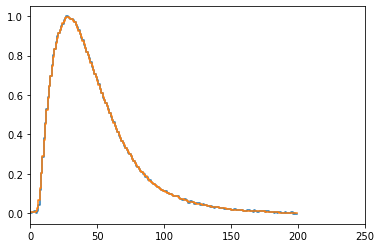

In [73]:
ran = (0,250)
plt.plot(template[0:200],drawstyle='steps')
plt.plot(template_smooth[0:200,0],template_smooth[0:200,1],drawstyle='steps')
plt.xlim(ran)
#plt.ylim([0,0.2])

In [221]:
def find_t0(ToT_target,template):
    
    tcorr = 0
    vmin = 0
    vmax = 1
    
    
    idx=template.argmax()
    itry = 0

    scale = 0
    while(1):
        
        scale = (vmin+vmax)/2

        ft = template[0:idx] - scale
        t0 = len(ft[ft<0])
        
        ft = template[idx:-1] - scale
        t1 = len(ft[ft>0])+idx
    
        print(itry,' t0=',t0,' t1=',t1,' dt=',t1-t0)
        itry=itry+1
        
        ToT_meas = t1- t0
        
        if ToT_meas>ToT_target:
            vmin = scale
        else:
            vmax = scale
                
        if abs(ToT_meas-ToT_target)<1 or itry>100:
            break
    
    tcorr = t0
    
    return tcorr, scale

In [222]:
ToT = 40

t0, S = find_t0(ToT,template_smooth[:,1])

0  t0= 13  t1= 61  dt= 48
1  t0= 18  t1= 47  dt= 29
2  t0= 15  t1= 54  dt= 39
3  t0= 14  t1= 57  dt= 43
4  t0= 15  t1= 55  dt= 40


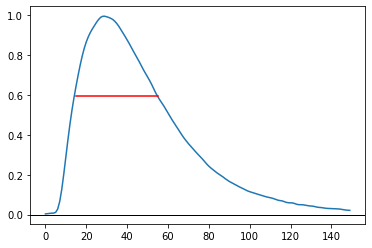

In [225]:
plt.plot(template_smooth[0:150,1])
plt.plot([t0,t0+ToT],[S,S],'-',color='red')
plt.axhline(0, color='black',linewidth=1)
